In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing data and looking at it
Since column 1 is date we used parse_date parameter

In [2]:
df = pd.read_csv("WeatherAUS.csv",header=0,parse_dates=[0])

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

<AxesSubplot:xlabel='Rainfall', ylabel='RainToday'>

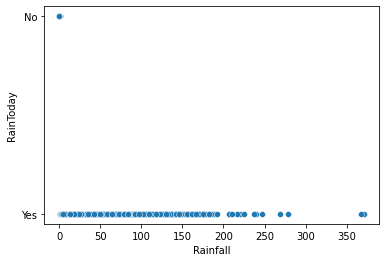

In [5]:
sns.scatterplot(x='Rainfall',y='RainToday',data=df)

The above scatterplot shows that for rainfall>0 it will rain today

<AxesSubplot:xlabel='Rainfall', ylabel='RainTomorrow'>

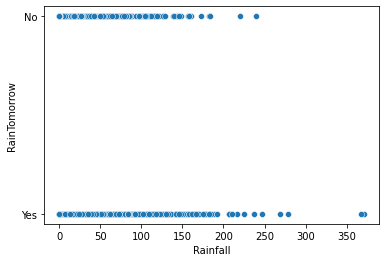

In [6]:
sns.scatterplot(x='Rainfall',y='RainTomorrow',data=df)

In [7]:
df['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [8]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
del df['Date']

<AxesSubplot:xlabel='Year', ylabel='count'>

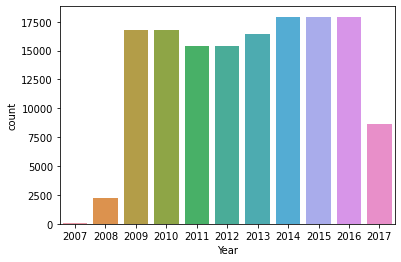

In [10]:
sns.countplot(x='Year',data=df)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

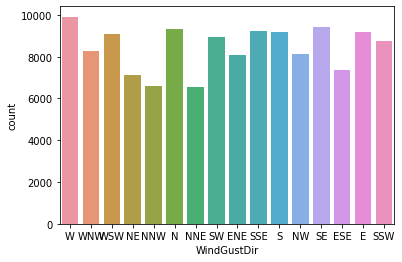

In [11]:
sns.countplot(x='WindGustDir',data = df)

In [12]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [13]:
def winds(col):
    x = df[col]
    l,l1,l2=[],[],[]
    for i in x:
        l.append(i[0])
        if len(i)==3:
            l1.append(i[1])
            l2.append(i[2])
        else:
            l1.append(i[0])
            l2.append(i[0])
            
    df[col+"1"] = l
    df[col+"2"] = l1
    df[col+"3"] = l2  

Replacing the na with max value of wind direction which was WSW

In [14]:
for i in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[i].fillna('WSW',inplace=True)
    winds(i)
    del df[i]

In [15]:
df = pd.get_dummies(data=df,columns=['RainToday','RainTomorrow'],drop_first=True)

In [16]:
df['RainTomorrow_Yes'].value_counts()

0    113583
1     31877
Name: RainTomorrow_Yes, dtype: int64

Replacing na values with mean because it makes more sense and keeps the data continous

In [17]:
for  i in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']:
    df[i].fillna(df[i].mean(),inplace=True)

In [18]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year', 'WindGustDir1',
       'WindGustDir2', 'WindGustDir3', 'WindDir9am1', 'WindDir9am2',
       'WindDir9am3', 'WindDir3pm1', 'WindDir3pm2', 'WindDir3pm3',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb = LabelEncoder()
for i in ['Location','WindGustDir1',
       'WindGustDir2', 'WindGustDir3', 'WindDir9am1', 'WindDir9am2',
       'WindDir9am3', 'WindDir3pm1', 'WindDir3pm2', 'WindDir3pm3']:
    df[i] = lb.fit_transform(df[i])

In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir2,WindGustDir3,WindDir9am1,WindDir9am2,WindDir9am3,WindDir3pm1,WindDir3pm2,WindDir3pm3,RainToday_Yes,RainTomorrow_Yes
0,2,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,...,3,3,3,3,3,3,1,3,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,...,1,3,1,1,3,3,2,3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,...,2,3,3,3,3,3,2,3,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,...,1,1,2,2,2,0,0,0,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,...,3,3,0,1,0,1,1,1,0,0


### Splitting data into x and y

In [22]:
x = df.drop('RainTomorrow_Yes',axis=1)

In [23]:
y=df['RainTomorrow_Yes']

In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow_Yes, Length: 145460, dtype: uint8

For KNN, we need scaled data

In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
xs= scaler.transform(x)

Splitting data into train and test sets.
Using random state=0 to produce same results everytime

In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(xs,y,test_size=0.2,random_state=0)

## Using KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_1=KNeighborsClassifier(n_neighbors=3)
knn_1.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred= knn_1.predict(test_x)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
confusion_matrix(test_y,y_pred)

array([[20948,  1778],
       [ 3410,  2956]], dtype=int64)

In [32]:
accuracy_score(test_y,y_pred)

0.8216691874054723

## Using  Grid Search to optimize value of n

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}

In [35]:
grid_search = GridSearchCV(KNeighborsClassifier(),params)

In [ ]:
grid_search.fit(train_x,train_y)

In [ ]:
opp_KNN= grid_search.best_estimator_

In [ ]:
y_pred1= opp_KNN.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred1)

# Using Support Vector

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel="linear",C=0.01)
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred2)

In [ ]:
confusion_matrix(test_y,y_pred2)

In [ ]:
svc = SVC(kernel="rbf")
svc.fit(train_x,train_y)
y_pred3 = svc.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred3)

In [ ]:
cm3=confusion_matrix(test_y,y_pred3)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm3)

In [ ]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=3)
tr.fit(train_x,train_y)

In [ ]:
y_pred4 = tr.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred4)

In [ ]:
params1 = {"max_depth":[1,2,3,4,5,6]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(tree.DecisionTreeClassifier(),params1)

In [ ]:
grid_search.fit(train_x,train_y)

In [ ]:
grid_search.best_params_

In [ ]:
opp_tree = grid_search.best_estimator_

In [ ]:
y_pred4 = opp_tree.predict(test_x)

In [ ]:
accuracy_score(y_pred4,test_y)

### Since accuracy is less,lets try ensemble learning methods.

1.Bagging

In [ ]:
btree = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bclf = BaggingClassifier(base_estimator=btree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [ ]:
bclf.fit(train_x,train_y)

In [ ]:
y_pred_bcl = bclf.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred_bcl)

2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
rfclf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [ ]:
rfclf.fit(train_x,train_y)

In [ ]:
y_pred_rfcl = rfclf.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred_rfcl)

3. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [ ]:
gbclf = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000,max_depth=6)

In [ ]:
gbclf.fit(train_x,train_y)

In [ ]:
y_pred_gbclf = gbclf.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred_gbclf)

Ada Boosting

In [ ]:
ada = AdaBoostClassifier(base_estimator=btree,learning_rate=0.01,n_estimators=1000,random_state=42)

In [ ]:
ada.fit(train_x,train_y)

In [ ]:
y_pred_ada = ada.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred_ada)

So random forest gives highest accuracy of 85.9%~86%